In [418]:
%%bash
nfile="./dwt_plot_test/test_street_snr_10_440_16k.wav"
lv=5
wname="db20"
c_or_d="d"
ign="[5]"
rec_level='d1234'
dnfile="./dwt_plot_test/test_street_snr_10_440_16k_${wname}_${c_or_d}_${rec_level}.wav"


tools/denoise_dwt/dwt_reconstruct.py --nfile $nfile --dnfile $dnfile --level $lv --wav_name $wname --ign_level $ign --c_or_d $c_or_d --uttid "test"

[8000.0, 4000.0, 2000.0, 1000.0, 500.0, 250.0]

In [136]:
from scipy.io import wavfile
from scipy.signal import spectrogram
import matplotlib.pyplot as plt
import numpy as np
import pywt

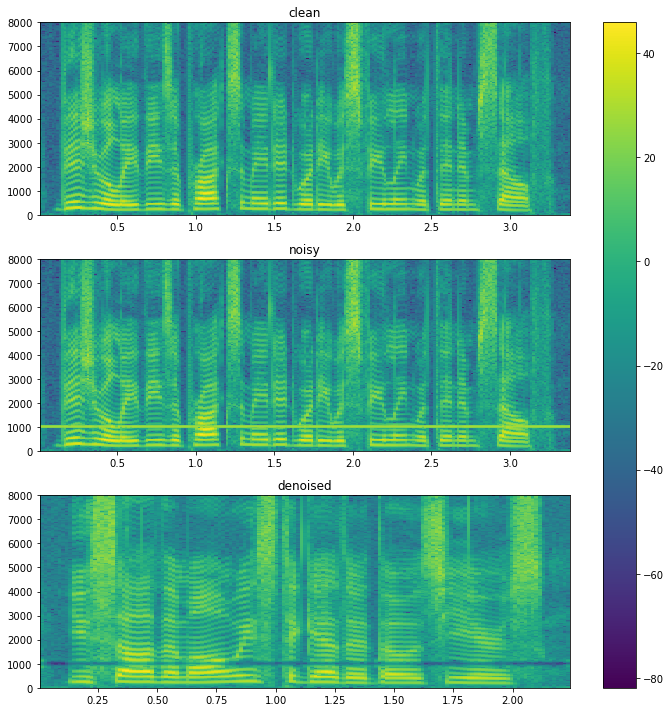

In [361]:
timit_noisy_data='/export/b07/jyang/kaldi-jyang/kaldi/egs/timit/s5/data_noisy_mine/noise_sin_1000hz_snr_10_snr_10/TIMIT/TEST/DR7/FDHC0/SI1559.WAV'
#timit_denoised_d12345_db8='/export/b07/jyang/kaldi-jyang/kaldi/egs/timit_dwt/s5/data/denoised_db8_L_5_d_d12345/noise_street_snr_10/TEST/DR7/FDHC0/SI1559.WAV'
#timit_denoised_d1234_db8='/export/b07/jyang/kaldi-jyang/kaldi/egs/timit_dwt/s5/data/denoised_db8_L_5_d_d1234/noise_street_snr_10/TEST/DR7/FDHC0/SI1559.WAV'
dnoised = '/export/b07/jyang/kaldi-jyang/kaldi/egs/timit_dwt/s5/data/denoised_db20_L_6_wvpk_cd_ign_78/noise_sin_1000hz_snr_10_snr_10/TIMIT/TEST/DR7/FDHC0/SI2189.WAV'
noise = '/export/b07/jyang/kaldi-jyang/kaldi/egs/timit_dwt/s5/noise_100hz.wav'

fsc, cwav = wavfile.read('/export/b07/jyang/kaldi-jyang/kaldi/egs/timit_dwt/s5/timit_clean.wav')
fsn, nwav = wavfile.read(timit_noisy_data)
fsd, dwav = wavfile.read(dnoised)
#fsd, dwav2 = wavfile.read(timit_denoised_d1234_db8)

fig, axarr = plt.subplots(3, figsize=(10,10))
Pxx, freq, bins, im = axarr[0].specgram(cwav, Fs=fsc, NFFT=int(fsc/40), noverlap=int(fsc/100))
Pxx2, freq2, bins2, im2 = axarr[1].specgram(nwav, Fs = fsn, NFFT = int(fsn/40), noverlap=int(fsn/100))
Pxx3, freq3, bins3, im3 = axarr[2].specgram(dwav, Fs = fsd, NFFT = int(fsd/40), noverlap=int(fsd/100))
axarr[0].set_title('clean')
axarr[1].set_title('noisy')
axarr[2].set_title('denoised')
plt.tight_layout()
fig.colorbar(im, ax=axarr.ravel().tolist())
plt.show()
#print (mse(cwav, dwav))

In [11]:
def mse(ori, esti):
    if len(ori) > len(esti):
        wavlen = len(esti)
    else:
        wavlen = len(ori)
    err = np.zeros(wavlen)
    ori_seg = ori[:wavlen]
    esti_seg = esti[:wavlen]
    #ori_power = np.sum(np.square(ori_seg, dtype='int64'), dtype='int64') 
    #esti_power = np.sum(np.square(esti_seg, dtype='int64'), dtype='int64') 
    #for i in range(wavlen):
    #    err[i] = ori_seg[i] - esti_seg[i]
    err = ori_seg - esti_seg
    serr = np.square(err)
    return 1/wavlen * np.sum(serr) 

In [444]:
if (cwav.any() == nwav.any()):
    print (1)

1


97805953
90908485249.0
(91622,)
(91622,)


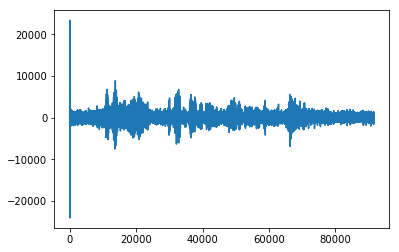

In [480]:
a = dwav
b = nwav
c = a[:len(b)] - b
d = np.zeros(len(c))
for i in range(len(c)):
    d[i] = a[i] - b[i]
print (np.sum(np.square(c)))
print(np.sum(np.square(d)))
print (c.shape)
print (d.shape)
plt.plot(list(c))
#plt.plot(list(d))
plt.show()

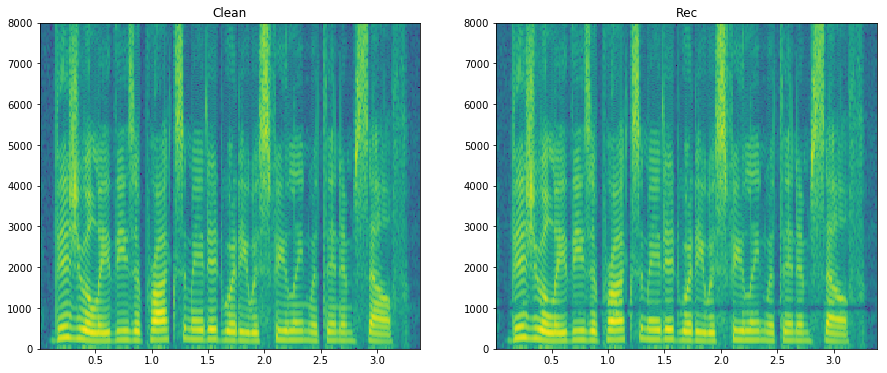

In [363]:
testwp = pywt.WaveletPacket(data = nwav, wavelet='db20', mode='sym', maxlevel=6)
nodes = [n.path for n in testwp.get_level(6, 'freq')]

## Ignore some level
ign = [7,8]
newwp = testwp
for i in ign:
    testwp[nodes[i]].data = np.zeros(len(testwp[nodes[i]].data))
##

## Rec only with level
#only = 1
#newwp = pywt.WaveletPacket(data=np.zeros(testwp.data.shape), wavelet='db20', mode = 'sym', maxlevel=2)
#newwp[nodes[only]].data = testwp[nodes[only]].data

new = testwp.reconstruct(False).astype(np.int16)

fig, (axclean, axrec) = plt.subplots(1,2, figsize=(15, 6))
cfreqs, ct, cSxx = spectrogram(cwav, fs = 16000, window='hamming', nfft=512)
nfreqs, nt, nSxx = spectrogram(new, fs = 16000, window='hamming', nfft=512)
axclean.pcolormesh(ct, cfreqs, np.log(cSxx))
axclean.set_title('Clean')
axrec.pcolormesh(nt, nfreqs, np.log(nSxx))
axrec.set_title('Rec')
#print (new.astype(np.int16))
plt.show()
#print (new)
#print (testwp[nodes[7]])
#print (testwp[nodes[8]])

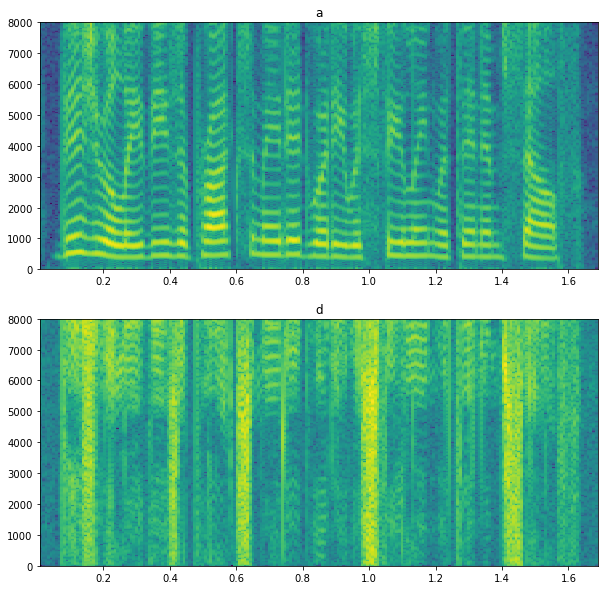

In [304]:
testwp = pywt.WaveletPacket(data = cwav, wavelet='db20', mode='sym', maxlevel=1)
nodes_natr = [n.path for n in testwp.get_level(1, 'natural')]
nodes_freq = [n.path for n in testwp.get_level(1, 'freq')]

fig, axx_arr = plt.subplots(2, 1, figsize=(10,10))
axx_arr = axx_arr.ravel()

for i in range(2):
    wave = testwp[nodes_natr[i]].data
    freqs, t, Sxx = spectrogram(wave, fs = 16000, window='hamming', nfft=512, noverlap=512/4)
    axx_arr[i].pcolormesh(t, freqs, np.log(Sxx))
    axx_arr[i].set_title(nodes_natr[i])
    #axx_arr[i].plot(wave)
plt.show()



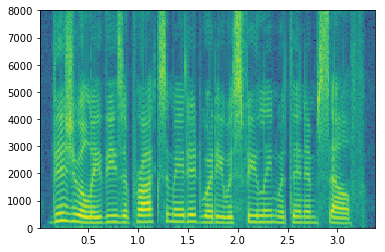

In [182]:
w = cwav
f = 16000
freqs, t, Sxx = spectrogram(w, fs=f, window='hamming', nperseg=int(f/40), noverlap=int(f/100))
plt.pcolormesh(t, freqs, np.log(Sxx))
plt.show()

In [183]:
nodes_natr = [n.path for n in testwp.get_level(2, 'natural')]
nodes_freq = [n.path for n in testwp.get_level(2, 'freq')]
print (nodes_natr)
print (nodes_freq)

['aa', 'ad', 'da', 'dd']
['aa', 'ad', 'dd', 'da']


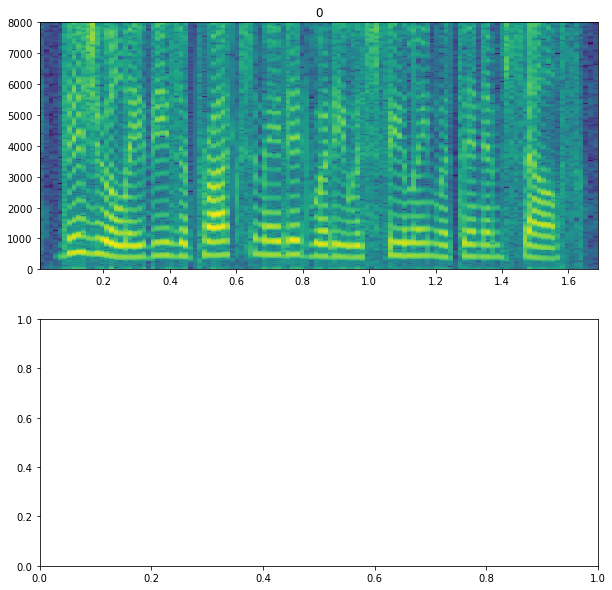

array([False, False, False, ..., False, False, False], dtype=bool)

In [298]:
#approx, detail = pywt.dwt(testwp.data, 'db20')
L = 1
fig, axx_arr = plt.subplots(2, 1, figsize=(10,10))
for i in range(L):
    approx = testwp.data
    approx, d = pywt.dwt(approx, 'db20')
    freqs, t, Sxx = spectrogram(approx, fs = 16000, window='hamming', nfft=512)
    axx_arr[i].pcolormesh(t, freqs, np.log(Sxx))
    axx_arr[i].set_title(i)
    #axx_arr[i].plot(wave)
plt.show()
d == testwp['d']

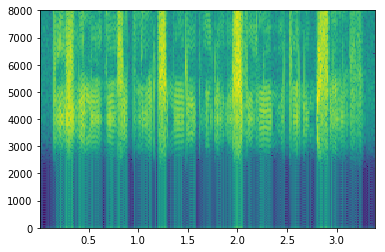

In [207]:
approx = np.zeros(approx.shape)
rec = pywt.idwt(approx, d, 'db20')
dfreqs, dt, dSxx = spectrogram(rec, fs = 16000, window='hamming', nfft=512)
plt.pcolormesh(dt, dfreqs, np.log(dSxx))
plt.show()

In [310]:
l = 4;
fmax = 8000;
a = []
for i in range (l+1):
    a.append(8000/(2 ** l) * i)
a

[0.0, 500.0, 1000.0, 1500.0, 2000.0]

In [262]:
testwp[nodes[only]].data.shape

(13623,)

In [278]:
for n in nodes:
    print (newwp[n].data.shape)

(13623,)
(13623,)
(13623,)
(13623,)


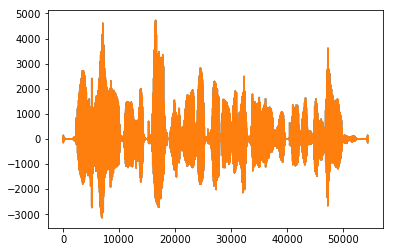

In [356]:
plt.plot(new)
plt.plot(new.astype(np.int16))
plt.show()